# Hotel Booking

In [8]:
import pandas as pd
import numpy as np

In [34]:
df = pd.read_csv('La_Veranda_Reviews-2023-01-16.csv',encoding="utf8")
df = df.sample(frac=1, random_state=10)

In [35]:
df.head()

,Title,PositiveReview,NegativeReview,Score,GuestName,GuestCountry,RoomType,NumberOfNights,VisitDate,GroupType,PropertyResponse
1144,Exceptional,NaN,NaN,10.0,Valentin,Romania,Standard Triple Room,1 night,December 2022,Family,NaN
1055,Exceptional,NaN,NaN,10.0,Barbara,Austria,Family Suite with Balcony,2 nights,August 2021,Group,NaN
273,La Veranda Hotel offers everything you need.,I had a wonderful experience at the La Veranda...,NaN,10.0,Dayane,Lebanon,Double Room,1 night,April 2022,Solo traveler,NaN
537,Great stopover at the airport\n\n\nGreat stopo...,Terrace was very cozy,It was very hot but that was the weather,8.0,Hans,Netherlands,Budget Twin Room,1 night,September 2022,Couple,NaN
684,Again and again\n\n\nAgain and again,Clean and modern hotel with very friendly staff.,NaN,8.0,Fabian,Germany,Standard Triple Room,1 night,September 2021,Group,NaN


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1523 entries, 1144 to 1289
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Title             1521 non-null   object 
 1   PositiveReview    775 non-null    object 
 2   NegativeReview    434 non-null    object 
 3   Score             1523 non-null   float64
 4   GuestName         1523 non-null   object 
 5   GuestCountry      1523 non-null   object 
 6   RoomType          1460 non-null   object 
 7   NumberOfNights    1523 non-null   object 
 8   VisitDate         1523 non-null   object 
 9   GroupType         1523 non-null   object 
 10  PropertyResponse  123 non-null    object 
dtypes: float64(1), object(10)
memory usage: 142.8+ KB


In [36]:
# Drop missing values
df.dropna(inplace=True)

# Remove any 'neutral' ratings equal to 3
df = df[df['Score'] != 5.0]

# Encode 4s and 5s as 1 (rated positively)
# Encode 1s and 2s as 0 (rated poorly)
df['Positively Rated'] = np.where(df['Score'] > 5.0, 1, 0)

In [37]:
df['Positively Rated'].unique()

array([1, 0])

In [38]:
df.head()

,Title,PositiveReview,NegativeReview,Score,GuestName,GuestCountry,RoomType,NumberOfNights,VisitDate,GroupType,PropertyResponse,Positively Rated
225,"Nice, clean, priceworthy and with great staff!",Excellent staff in this family driven hotel. V...,Except excellent staff/owners and an ok restau...,9.0,Travelling,Sweden,Double Room with Balcony,3 nights,May 2022,Couple,thank you for your comments and for all these ...,1
731,An excellent hotel and extremely kind owners\n...,This hotel is very very clean very well equipp...,Nothing everything is perfect,10.0,Raphael,France,Double Room with Balcony,1 night,June 2021,Solo traveler,Thank you very much for your comments; we are ...,1
773,Pleasant\n\n\nPleasant,"Clean, comfortable, nice staff.",The breakfast is delicious but the same. Eat w...,6.0,Tatiana,Russia,Double Room with Balcony,3 nights,August 2021,Solo traveler,Thank you for your comments. There is a bus st...,1
729,Exceptional\n\n\nExceptional,Great option for if you arrive at Larnaca airp...,To restaurants and the beach go through an int...,10.0,Александр,Russia,Two-Bedroom Suite,1 night,July 2021,Family,thank you for your nice comments; we are glad ...,1
721,Wonderful\n\n\nWonderful,Super clean modern room and bathroom with balc...,The street on which the hotel is located.,9.0,Erwin,Netherlands,Double Room with Balcony,1 night,July 2021,Couple,thank you so much for your nice comments; we w...,1


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 62 entries, 225 to 395
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Title             62 non-null     object 
 1   PositiveReview    62 non-null     object 
 2   NegativeReview    62 non-null     object 
 3   Score             62 non-null     float64
 4   GuestName         62 non-null     object 
 5   GuestCountry      62 non-null     object 
 6   RoomType          62 non-null     object 
 7   NumberOfNights    62 non-null     object 
 8   VisitDate         62 non-null     object 
 9   GroupType         62 non-null     object 
 10  PropertyResponse  62 non-null     object 
 11  Positively Rated  62 non-null     int32  
dtypes: float64(1), int32(1), object(10)
memory usage: 6.1+ KB


# Model Selection in scikit-learn

In [40]:
from sklearn.model_selection import train_test_split

# Split data into train and test subsets
X_train, X_test, y_train, y_test = train_test_split(df['PositiveReview'], 
                                                    df['Positively Rated'], 
                                                    random_state=0)

In [41]:
print( X_train.iloc[15]) 

Location: close to airport and beach. Newly refurbished hotel, rooms with balconies and clean.


In [42]:
X_train.shape

(46,)

In [43]:
X_test.shape

(16,)

In [44]:
from sklearn.feature_extraction.text import CountVectorizer

docs = np.array([
    'Great modern room comfortable bed and quiet location',
    'Close to airport',
    'Amazing staff'])

# Fit the CountVectorizer to the training data 
vect1=CountVectorizer().fit(docs)

# transform the documents in the training data to a document-term matrix. 
bag = vect1.transform(docs)

In [45]:
vect1.vocabulary_

{'great': 6,
 'modern': 8,
 'room': 10,
 'comfortable': 5,
 'bed': 3,
 'and': 2,
 'quiet': 9,
 'location': 7,
 'close': 4,
 'to': 12,
 'airport': 0,
 'amazing': 1,
 'staff': 11}

In [46]:
vect1.get_feature_names_out()

array(['airport', 'amazing', 'and', 'bed', 'close', 'comfortable',
       'great', 'location', 'modern', 'quiet', 'room', 'staff', 'to'],
      dtype=object)

In [47]:
# Fit the CountVectorizer to the training data 
review1 = CountVectorizer().fit(X_train)

# transform the documents in the training data to a document-term matrix. 
X_train_vectorized1 = review1.transform(X_train) #bag of words (unique token in vectors format)


print(len(review1.get_feature_names_out()))
X_train_vectorized1.shape

448


(46, 448)

In [48]:
review1.vocabulary_

{'very': 409,
 'clean': 77,
 'nice': 249,
 'renovated': 320,
 'rooms': 329,
 'staff': 356,
 'was': 418,
 'fantastic': 145,
 'and': 22,
 'price': 290,
 'great': 165,
 'the': 375,
 'la': 202,
 'veranda': 408,
 'has': 173,
 'been': 50,
 'recently': 312,
 'refurbished': 317,
 'bathroom': 42,
 'were': 426,
 'both': 59,
 'modern': 234,
 'comfortable': 85,
 'balcony': 40,
 'with': 436,
 'sea': 333,
 'view': 410,
 'easy': 121,
 'walk': 413,
 'to': 384,
 'mackenzie': 219,
 'beach': 44,
 'short': 341,
 'journey': 196,
 'from': 155,
 'airport': 12,
 'good': 164,
 'breakfast': 61,
 'available': 36,
 'if': 188,
 'required': 321,
 'extremely': 140,
 'helpful': 179,
 'friendly': 154,
 'nothing': 254,
 'much': 239,
 'trouble': 395,
 'close': 81,
 'bars': 41,
 'near': 243,
 'perfect': 274,
 'play': 278,
 'relax': 318,
 'owners': 270,
 'mum': 240,
 'children': 74,
 'lebanon': 209,
 'are': 27,
 'kind': 200,
 'ready': 306,
 'help': 178,
 'even': 132,
 'they': 378,
 'invite': 192,
 'you': 446,
 'sit': 346,

In [49]:
review1.get_feature_names_out()

array(['10', '12', '15', 'about', 'access', 'account', 'adapter',
       'addition', 'advantage', 'affordable', 'after', 'aircon',
       'airport', 'all', 'alone', 'already', 'also', 'although', 'always',
       'alyki', 'amazing', 'an', 'and', 'animals', 'another', 'any',
       'anyone', 'are', 'area', 'arrival', 'arrive', 'arrived', 'as',
       'asking', 'at', 'atmosphere', 'available', 'back', 'backpackers',
       'balconies', 'balcony', 'bars', 'bathroom', 'be', 'beach',
       'beaches', 'beautiful', 'because', 'bed', 'bedding', 'been',
       'before', 'being', 'best', 'better', 'between', 'beware',
       'blankets', 'booking', 'both', 'brand', 'breakfast', 'building',
       'bus', 'but', 'by', 'cafés', 'can', 'car', 'care', 'center',
       'check', 'chef', 'chief', 'children', 'chill', 'city', 'clean',
       'cleaner', 'cleanliness', 'clear', 'close', 'club', 'coffee',
       'come', 'comfortable', 'comfy', 'condition', 'contemporary',
       'convenient', 'conveniently'

# Logistic Regression classification

In [50]:
from sklearn.linear_model import LogisticRegression

# Train the model
model = LogisticRegression()
model.fit(X_train_vectorized1, y_train)

#x_train
#vectors (unique tokens)

LogisticRegression()

In [51]:
from sklearn.metrics import roc_auc_score

# Predict the transformed test documents
predictions = model.predict(review1.transform(X_test))
y_proba = model.predict_proba(review1.transform(X_test))
                              
print('AUC: ', roc_auc_score(y_test, y_proba[:,1]))    

AUC:  0.6


In [70]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()
X_train_vectorized = vect.fit_transform(X_train)

model = LogisticRegression()
model.fit(X_train_vectorized, y_train)

X_test_vectorized = vect.transform(X_test)

predictions = model.predict(X_test_vectorized)
y_proba = model.predict_proba(X_test_vectorized)

roc_auc = roc_auc_score(y_test, y_proba[:,1])
print('AUC:', roc_auc)

AUC: 0.6


In [71]:
model.coef_

array([[ 1.30111007e-02,  7.27619115e-03,  5.46124168e-03,
         6.30396443e-03,  5.89953392e-03,  3.58328394e-03,
         1.79315096e-03,  1.64139950e-05,  1.64139950e-05,
         3.12813678e-03,  1.76034042e-02,  1.80956495e-03,
         1.13133994e-01,  1.67857794e-02,  1.79315096e-03,
         1.64139950e-05,  2.38593600e-02,  1.79315096e-03,
         9.58802613e-03,  1.61513323e-02,  1.99685427e-02,
         2.12195161e-02, -2.08026871e-02,  3.76976903e-03,
         1.64139950e-05,  1.69596492e-02,  3.18524848e-03,
         3.74695016e-02,  1.06608836e-02,  1.47103224e-02,
         3.76976903e-03,  8.42006113e-03,  6.56559799e-05,
         2.77139714e-03,  3.93209606e-02,  3.52924626e-02,
         9.50599936e-03,  8.14783203e-03,  6.29632941e-03,
         9.63372901e-03,  2.17704758e-02,  1.52983583e-02,
         1.27410567e-02,  8.17069341e-03,  1.07086302e-01,
         1.64139950e-05,  2.66449515e-02,  1.64139950e-05,
         1.43470471e-02,  3.20935085e-02,  1.12991503e-0

In [56]:
model.coef_[0].argsort()

array([441, 323, 377, 200, 273, 426, 375,  22, 241, 288,  45, 362, 383,
       133, 361, 360,  68, 349, 260,  47, 256, 184, 385, 291, 102, 113,
        98, 304, 305, 310,  93, 115, 327, 120, 334, 335, 340,  78, 345,
       394,  55, 283, 156, 215, 218, 412, 160, 162,  15, 430, 433,  24,
       166,   7, 435, 442, 231, 232, 404, 399, 170,   8,  91, 207, 443,
       104, 417, 392, 372,  52, 248,  32, 259,  92,  53, 309,   6, 357,
       299, 103, 144, 295, 293, 281, 143, 406, 280, 319, 159, 128, 350,
       131, 127, 420, 125, 397, 117, 134, 265,  17, 336,  58,  14,  84,
       114,  54,  11, 403, 257, 228, 251, 223, 380, 100,  62, 359, 434,
       423,  33, 111, 428, 391, 405, 351, 138,   9, 169, 298, 226,  26,
       129, 416, 227, 429, 203, 190, 370, 292,  75, 314,  83, 348, 324,
       367, 192, 445, 185, 168, 326, 118, 201, 278, 163,  51, 427, 122,
       365, 132, 158, 210, 415,  74, 346, 209, 146, 240, 224,  67, 263,
       366, 398, 252, 343, 245, 411, 447, 105,  56,   5, 271,  9

In [72]:
# get the feature names as numpy array
feature_names = np.array(review1.get_feature_names_out())

# Sort the coefficients from the model
sorted_coef_index = model.coef_[0].argsort()

# Find the 10 smallest and 10 largest coefficients
print('Smallest Coefs:' )
print(feature_names[sorted_coef_index[:10]])
      
print('\n Largest Coefs:')      
print(feature_names[sorted_coef_index[:-11:-1]])

Smallest Coefs:
['working' 'responsive' 'there' 'kind' 'people' 'were' 'the' 'and' 'must'
 'presented']

 Largest Coefs:
['very' 'clean' 'to' 'staff' 'was' 'rooms' 'is' 'friendly' 'hotel'
 'airport']


# Tfidf

In [59]:
from sklearn.feature_extraction.text import TfidfVectorizer


docs = np.array([
    'Great modern room comfortable bed and quiet location',
    'Close to airport',
    'Amazing staff'])

vect2 = TfidfVectorizer().fit(docs)
bag2 = vect2.transform(docs)

In [60]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Fit the TfidfVectorizer to the training data 
review2 = TfidfVectorizer(min_df=5).fit(X_train) #raw unique tokens

In [61]:
len(review2.get_feature_names_out())

44

In [62]:
X_train_vectorized2 = review2.transform(X_train) #unique tokens in vector format

model = LogisticRegression()
model.fit(X_train_vectorized2, y_train)

predictions = model.predict(review2.transform(X_test))
y_proba = model.predict_proba(review2.transform(X_test))
                              
print('AUC: ', roc_auc_score(y_test, y_proba[:,1])) 

AUC:  0.2


# n-grams

In [63]:
# Try 2-gram representation
docs = np.array([
    'Great modern room comfortable bed and quiet location',
    'Close to airport',
    'Amazing staff'])

vect3=CountVectorizer(ngram_range=(1,2)).fit(docs)
bag3=vect3.transform(docs)

In [64]:
vect3.vocabulary_

{'great': 11,
 'modern': 14,
 'room': 18,
 'comfortable': 9,
 'bed': 5,
 'and': 3,
 'quiet': 16,
 'location': 13,
 'great modern': 12,
 'modern room': 15,
 'room comfortable': 19,
 'comfortable bed': 10,
 'bed and': 6,
 'and quiet': 4,
 'quiet location': 17,
 'close': 7,
 'to': 21,
 'airport': 0,
 'close to': 8,
 'to airport': 22,
 'amazing': 1,
 'staff': 20,
 'amazing staff': 2}

In [65]:
review3 = CountVectorizer(min_df=5, ngram_range=(1,2)).fit(X_train) #raw unique tokens

X_train_vectorized3 = review3.transform(X_train) #vectorized unique tokens

In [66]:
len(review3.get_feature_names_out())

60

In [67]:
model = LogisticRegression()
model.fit(X_train_vectorized3, y_train)

predictions = model.predict(review3.transform(X_test))
y_proba = model.predict_proba(review3.transform(X_test))
                              
print('AUC: ', roc_auc_score(y_test, y_proba[:,1])) 

AUC:  0.5333333333333333


In [68]:
feature_names_out = np.array(review3.get_feature_names_out())

sorted_coef_index = model.coef_[0].argsort()

print('Smallest Coefs:' )
print(feature_names[sorted_coef_index[:10]])
      
print('\n Largest Coefs:')      
print(feature_names[sorted_coef_index[:-11:-1]])

Smallest Coefs:
['blankets' 'beach' 'about' 'anyone' '12' 'both' 'already' 'an' '15'
 'because']

 Largest Coefs:
['after' 'being' 'been' 'bathroom' 'bars' 'always' 'alyki' 'any' 'between'
 'area']


In [69]:
# These reviews are now correctly identified
print(model.predict(review3.transform(['Nothing except not showing opening times',
                                    'Great value for money'])))

[1 1]


In [74]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [75]:
df = pd.read_csv('La_Veranda_Reviews-2023-01-16.csv')
df.head()

,Title,PositiveReview,NegativeReview,Score,GuestName,GuestCountry,RoomType,NumberOfNights,VisitDate,GroupType,PropertyResponse
0,Wonderful place to stay.,"New, comfortable apartments, close to the airp...",Nothing at all.,10.0,Olga,Norway,Budget Twin Room,1 night,June 2022,Solo traveler,NaN
1,It was superb,We had a really pleasant stay! The staff was v...,NaN,10.0,Iwona,Poland,Double Room,3 nights,December 2022,Family,NaN
2,Very Good,the location is great and near the airport. bu...,NaN,8.0,Ruijia,Sweden,Double Room,1 night,December 2022,Solo traveler,NaN
3,Wonderful,Great stuff\nGreat Quality/price\nClean,NaN,9.0,Theprincem,United Kingdom,Double Room with Balcony,2 nights,September 2022,Solo traveler,NaN
4,"Fantastic value for a new, modern and spotless...","Clean and modern with very comfortable beds, i...",NaN,10.0,M,Switzerland,Family Suite with Balcony,1 night,October 2022,Family,NaN


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1523 entries, 0 to 1522
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Title             1521 non-null   object 
 1   PositiveReview    775 non-null    object 
 2   NegativeReview    434 non-null    object 
 3   Score             1523 non-null   float64
 4   GuestName         1523 non-null   object 
 5   GuestCountry      1523 non-null   object 
 6   RoomType          1460 non-null   object 
 7   NumberOfNights    1523 non-null   object 
 8   VisitDate         1523 non-null   object 
 9   GroupType         1523 non-null   object 
 10  PropertyResponse  123 non-null    object 
dtypes: float64(1), object(10)
memory usage: 131.0+ KB


In [77]:
df.describe()

,Score
count,1523.000000
mean,8.973802
std,1.300178
min,1.000000
25%,8.000000
50%,9.000000
75%,10.000000
max,10.000000


In [83]:
print('The unique categories of PositiveReview are')
df.PositiveReview.unique()

The unique categories of PositiveReview are


array(['New, comfortable apartments, close to the airport, to very clean beach.\nStaff is extremely helpful and easy to communicate with \nTasty food on the first floor, comfortable restaurant for both cozy evenings and calm work to escape the heat in the midday',
       'We had a really pleasant stay! The staff was very nice and helpful! The room was very clean, well decorated and modern, although not big. Also, the breakfast was amazing, fresh and handmade! Especially vegetarian version with humus. The cook is great, and all staff was very kind and helpful. I like hotels with a family atmosphere, cozy and not big. I recommend it.',
       'the location is great and near the airport. bus stop is very close.',
       'Great stuff\nGreat Quality/price\nClean',
       'Clean and modern with very comfortable beds, in a very convenient location.  An easy stroll to numerous nice restaurants and a great beach.',
       'We only stayed over night before heading to the airport. The room was ex

In [84]:
len(df.PositiveReview.unique())

769

In [85]:
print('The frequency table of PositiveReview are:/')
df.PositiveReview.value_counts()

The frequency table of PositiveReview are:/


PositiveReview
friendly staff                                                                                                                                                                                                                                                                                     3
All                                                                                                                                                                                                                                                                                                2
cleanliness                                                                                                                                                                                                                                                                                        2
everything                                                                                                

In [95]:
print('The percentage for each category of PositiveReview are in:/n')
df.PositiveReview.value_counts(normalize = True) *100

The percentage for each category of PositiveReview are in:/n


PositiveReview
friendly staff                                                                                                                                                                                                                                                                                     0.387097
All                                                                                                                                                                                                                                                                                                0.258065
cleanliness                                                                                                                                                                                                                                                                                        0.258065
everything                                                                           

<Axes: xlabel='Score', ylabel='PositiveReview'>

C:\Users\user\anaconda3.1\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 128591 (\N{PERSON WITH FOLDED HANDS}) missing from current font.
  func(*args, **kwargs)
C:\Users\user\anaconda3.1\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 128077 (\N{THUMBS UP SIGN}) missing from current font.
  func(*args, **kwargs)
C:\Users\user\anaconda3.1\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 127996 (\N{EMOJI MODIFIER FITZPATRICK TYPE-3}) missing from current font.
  func(*args, **kwargs)
C:\Users\user\anaconda3.1\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 127958 (\N{BEACH WITH UMBRELLA}) missing from current font.
  func(*args, **kwargs)
C:\Users\user\anaconda3.1\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 65292 (\N{FULLWIDTH COMMA}) missing from current font.
  func(*args, **kwargs)
C:\Users\user\anaconda3.1\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 128578 (\N{SLIGHTLY SMILING FAC

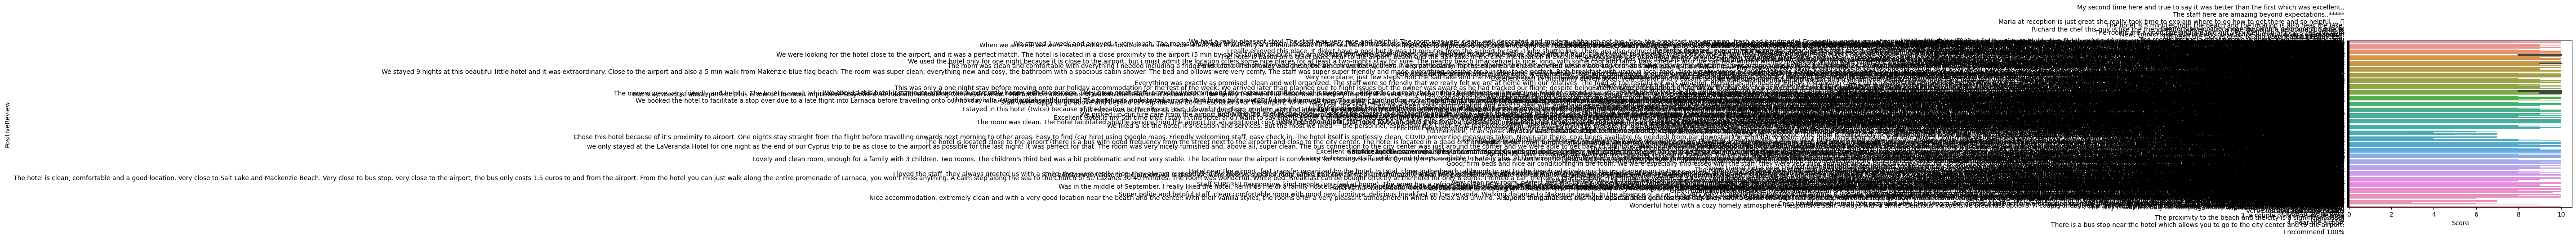

In [97]:
PositiveReview= df['PositiveReview']
Score = df['Score']

sns.barplot(y = PositiveReview, x = Score, data =df )